# Matplotlib 2.0

## One does not simply change all the defaults


### PyData Carolinas 2016

Thomas Caswell

Brookhaven National Lab | matplotlib

@tacaswell (gh + twitter)

tcaswell@gmail.com | tcaswell@bnl.gov

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import itertools
import matplotlib
import numpy as np
import matplotlib as mpl

## Release Schedule

### 1.5.3

 - September 2016

### 2.0
 - about a year late
 - 2.0.0b1 tagged July 2016
 - 2.0.0b4 available Sept 2016


```
pip install --pre matplotlib
```

or 

```
conda install matplotlib \
   -c conda-forge/label/rc -c conda-forge
```


## Release Schedule

### 2.1

 - As fast as we can (3-6 months) after 2.0
 - traitlets & UI class overhaul (have open PRs)
 - categorical plotting (currently on master branch)

### 2.x LTS
 
 - July 2018 
   - last version to support python 2.7
 - https://python-3-for-scientists.readthedocs.io
 - https://python3statement.github.io

## New default styles

![meme](meme.png)



 - Thought we could 'just change the rcParams' 
  - maybe a month or two of work

 - Found dragon infested rabbit holes

## `matplotlib.style` (new in 1.4)


<IPython.core.display.Javascript object>


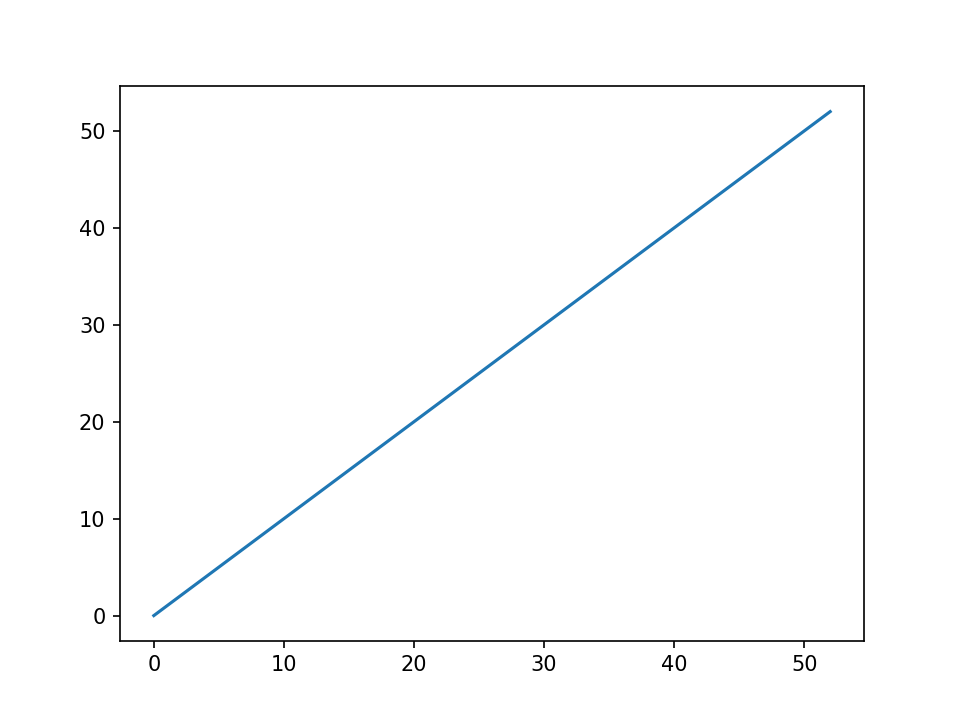

In [6]:
%matplotlib notebook
matplotlib.style.use('default')
fig, ax = plt.subplots()
ax.plot(range(53))

## `matplotlib.style`

In [7]:
import matplotlib.style as ms
ms.available

['classic',
 'seaborn-dark-palette',
 'seaborn-white',
 'seaborn-dark',
 'seaborn-colorblind',
 'seaborn-bright',
 'seaborn-deep',
 'seaborn-pastel',
 'ggplot',
 'bmh',
 'seaborn-notebook',
 'seaborn-ticks',
 'grayscale',
 'seaborn',
 'seaborn-talk',
 'seaborn-darkgrid',
 'seaborn-whitegrid',
 'seaborn-muted',
 'seaborn-poster',
 'dark_background',
 'fivethirtyeight',
 'seaborn-paper']

In [8]:
def new_color_cycle_demo(fig, ax1, ax2):
    def color_demo(ax, colors, title):
        th = np.linspace(0, 2*np.pi, 512)
        ax.set_title(title)
        for j, c in enumerate(colors):
            v_offset = -(j / len(colors))
            ax.plot(th, .1*np.sin(th) + v_offset, color=c)
            ax.annotate("'C{}'".format(j), (0, v_offset),
                        xytext=(-1.5, 0),
                        ha='right',
                        va='center',
                        color=c,
                        textcoords='offset points',
                        family='monospace')
            ax.annotate("{!r}".format(c), (2*np.pi, v_offset),
                        xytext=(1.5, 0),
                        ha='left',
                        va='center',
                        color=c,
                        textcoords='offset points',
                        family='monospace')
        ax.axis('off')
    old_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
                  '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                  '#bcbd22', '#17becf']
    color_demo(ax1, old_colors, 'classic')
    color_demo(ax2, new_colors, 'v2.0')
    fig.subplots_adjust(**{'bottom': 0.0, 'left': 0.059,
                           'right': 0.869, 'top': 0.895})

### Default color cycle

<IPython.core.display.Javascript object>


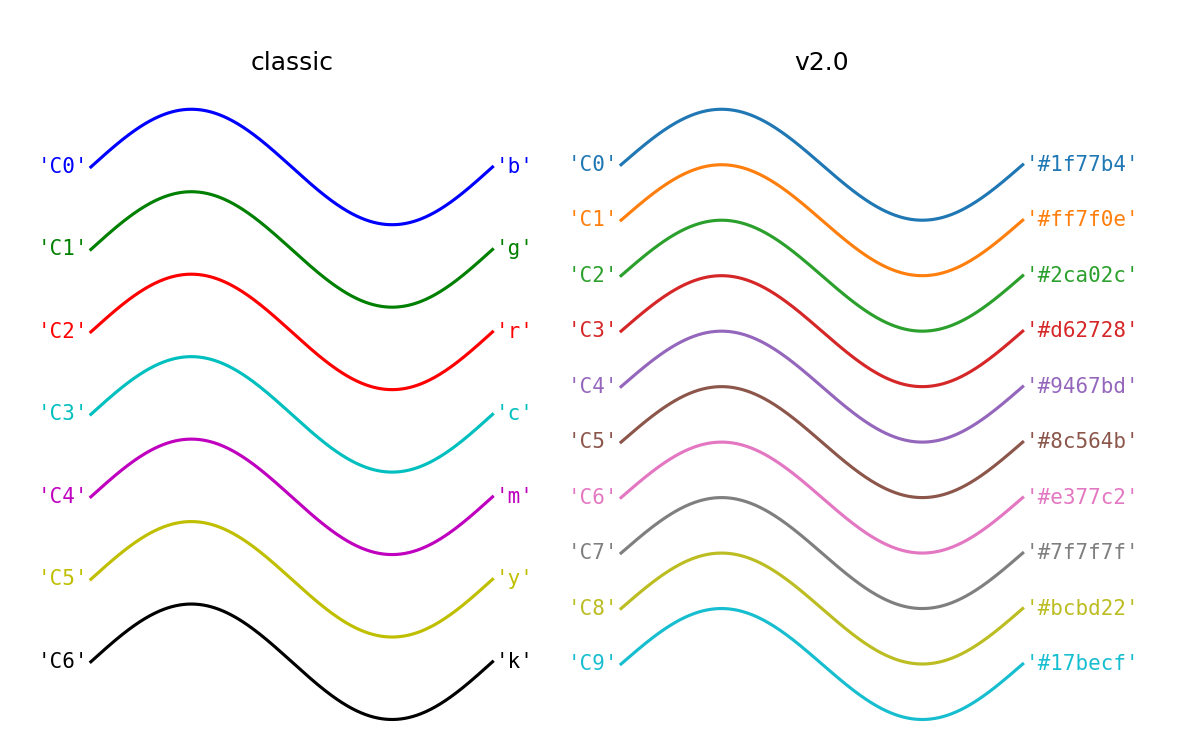

1

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
new_color_cycle_demo(fig, ax1, ax2)
1

### `'CN'` color notation

 - Nth color in `rcParams['axes.prop_cycle']`
 - used any other place mpl expects a 'color'

<IPython.core.display.Javascript object>


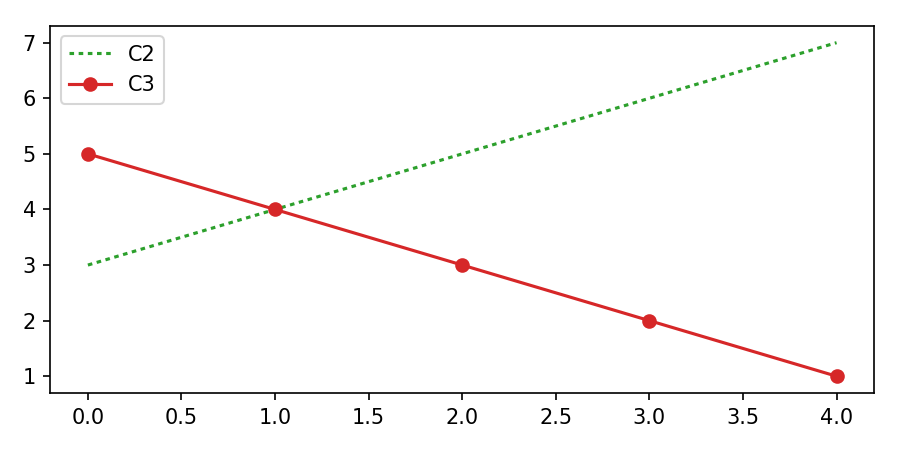

In [12]:
mpl.style.use('default')
fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)
ax.plot(3 + np.arange(5), ':', color='C2', label='C2')
ax.plot(5 - np.arange(5), 'C3o-', label='C3')
ax.legend()

### Cycler (new with 1.5)

http://matplotlib.org/cycler

In [13]:
from cycler import cycler
c = cycler('c', ['C1', 'C7'])
c2 = cycler('lw', [1, 2])
c3 = cycler('ls', ['-', '--', ':', '-.'])
c * c2

'C1',1
'C1',2
'C7',1
'C7',2


In [16]:
for sty in c * 2:
    print(sty)

{'c': 'C1'}
{'c': 'C7'}
{'c': 'C1'}
{'c': 'C7'}


### Cycler (new with 1.5)


http://matplotlib.org/cycler

<IPython.core.display.Javascript object>


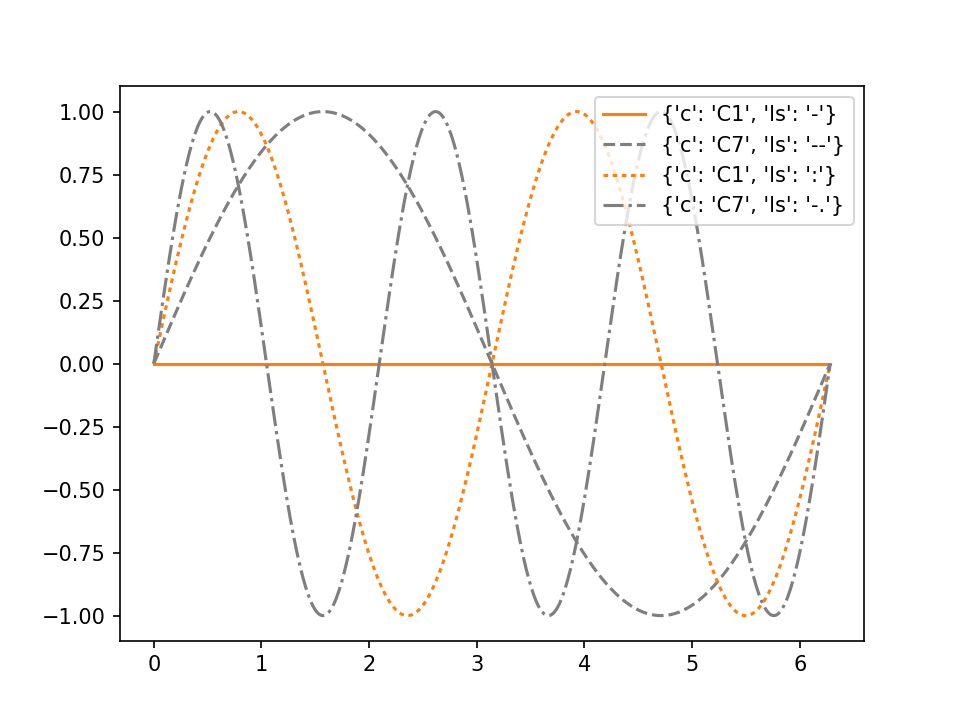

In [17]:
fig, ax = plt.subplots()
th = np.linspace(0, 2*np.pi, 512)
for j, sty in enumerate(c * 2 + c3):
    ax.plot(th, np.sin(th*j), **sty, label=str(sty))
ax.legend()

### `rcParams['axes.prop_cycle']` (new 1.5)

<IPython.core.display.Javascript object>


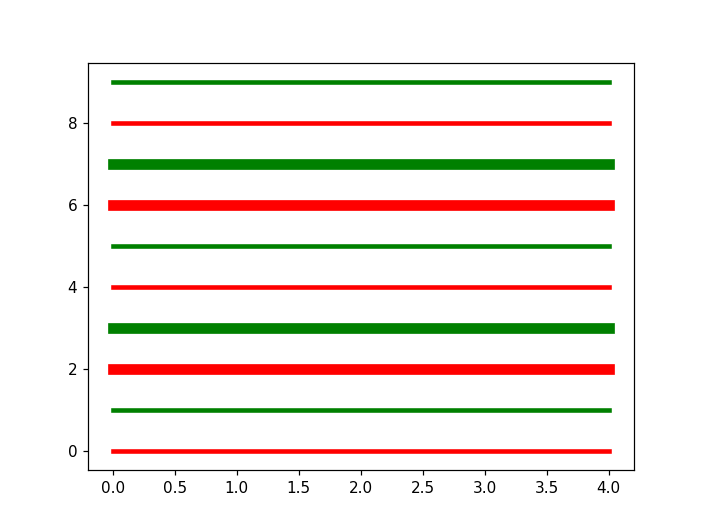

In [54]:
matplotlib.style.use('default')
mpl.rcParams['axes.prop_cycle'] =  cycler('lw', [3, 7]) * cycler('color', 'rg')

fig, ax = plt.subplots()
lns = ax.plot((np.ones(5) * np.arange(10).reshape(-1, 1)).T)

### More things follow `'axes.prop_cycle'`

<IPython.core.display.Javascript object>


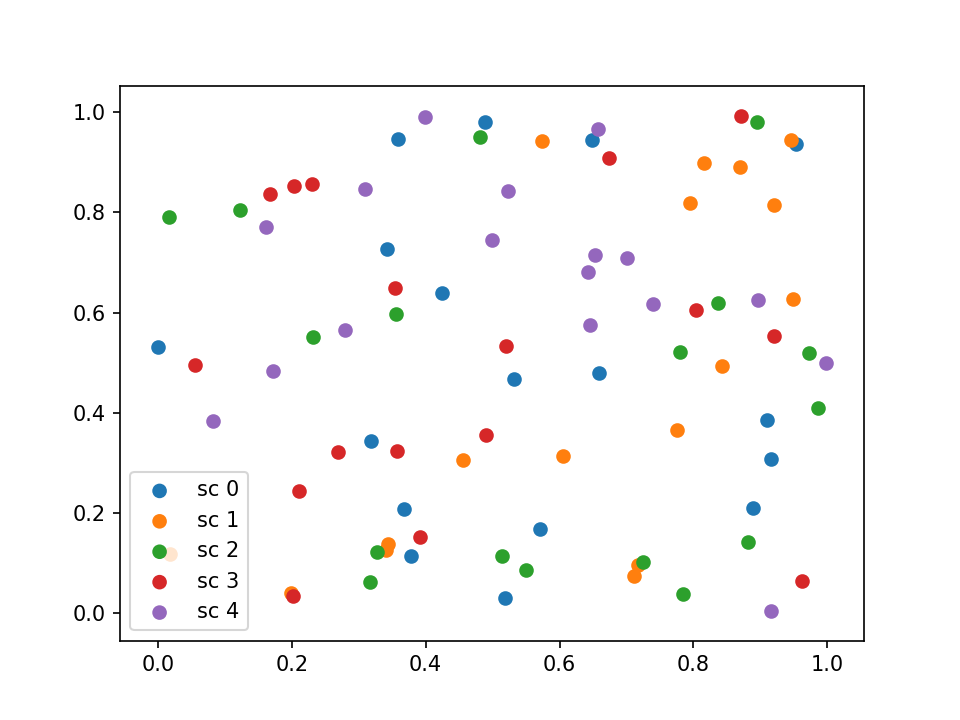

In [21]:
mpl.style.use('default')
fig, ax = plt.subplots()
for j in range(5):
    ax.scatter(np.random.rand(17), np.random.rand(17), label='sc {}'.format(j))
ax.legend()

### Dash scaling

 - dash patterns scale with line width
 - tweaked dash patterns

<IPython.core.display.Javascript object>


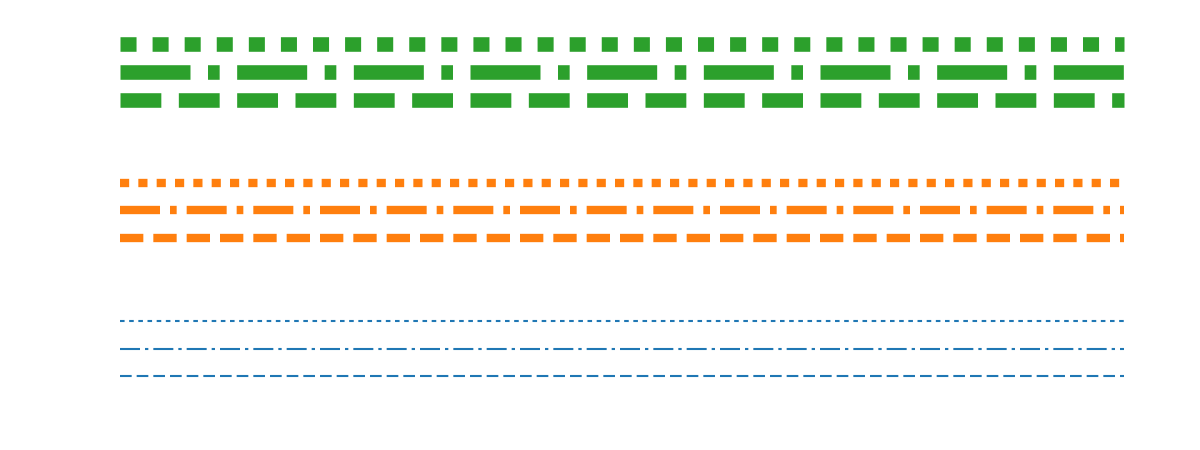

In [24]:
matplotlib.style.use('default')
fig, ax = plt.subplots(figsize=(8, 3), tight_layout=True)
ax.axis('off')
for j, lw in enumerate(range(1, 10, 3)):
    c = 'C{}'.format(j)
    y = np.array([j, j])
    ax.plot(y, lw=lw, linestyle='--', color=c)
    ax.plot(y+.2, lw=lw, linestyle='-.', color=c)
    ax.plot(y+.4, lw=lw, linestyle=':', color=c)

## `data` kwarg / native `pandas` support (new 1.5.x)

<IPython.core.display.Javascript object>


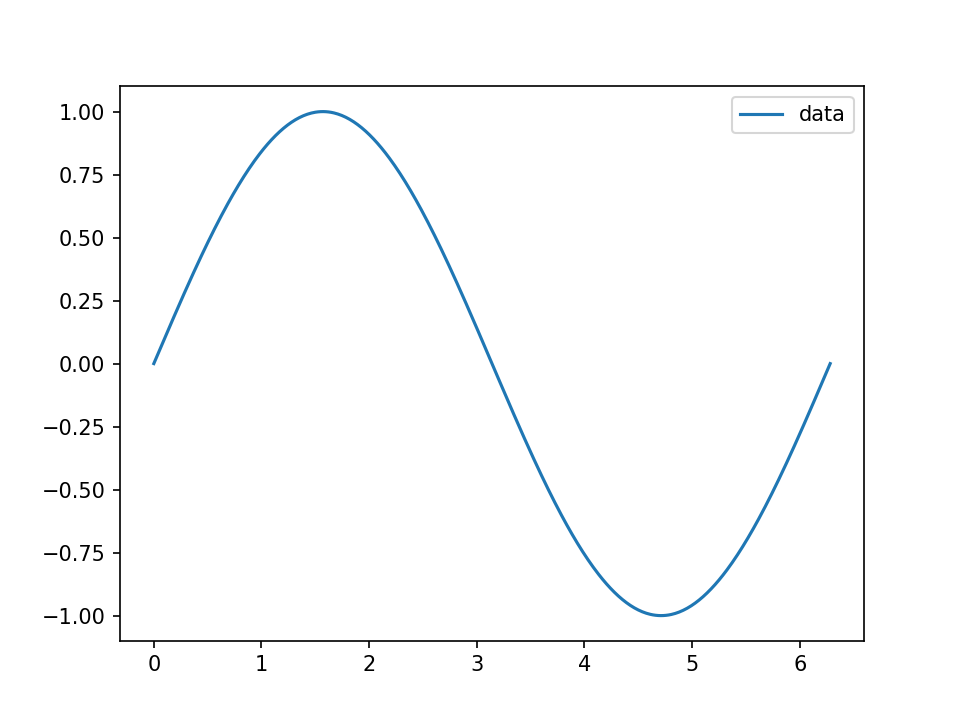

In [25]:
fig, ax = plt.subplots()
df = pd.DataFrame({'th': np.linspace(0, 2*np.pi, 512), 'data': np.sin(np.linspace(0, 2*np.pi, 512))}) 
ax.plot('th', 'data', data=df)
ax.legend()

## `data` kwarg / native `pandas` support (new 1.5.x)

<IPython.core.display.Javascript object>


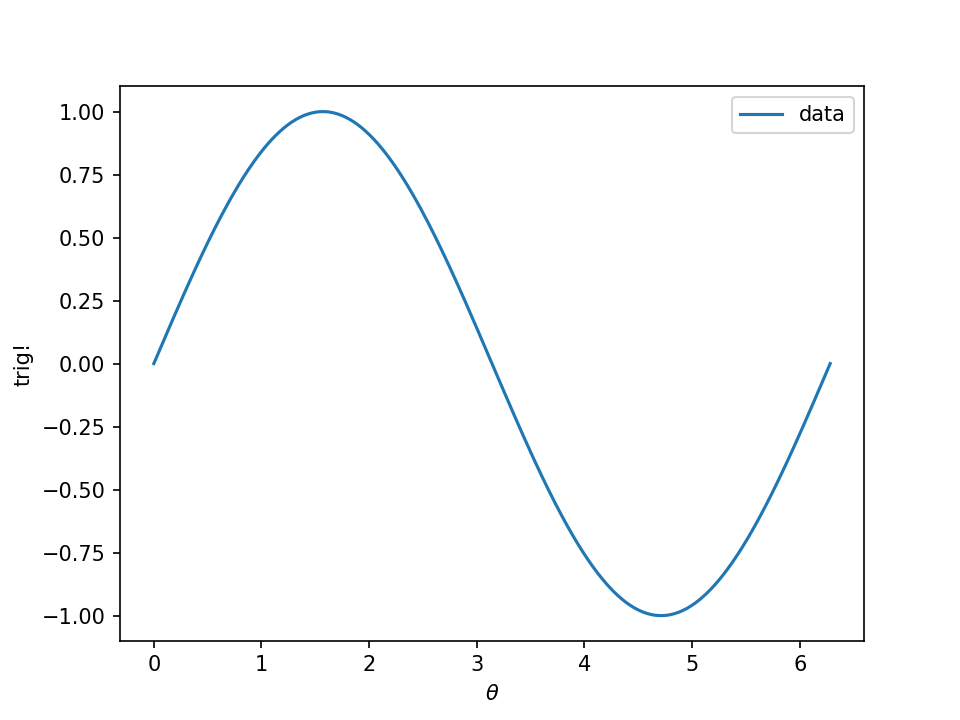

In [26]:
df = pd.DataFrame(index=np.linspace(0, 2*np.pi, 512), data={'data': np.sin(np.linspace(0, 2*np.pi, 512))}) 
fig, ax = plt.subplots()
ax.plot(df['data']) 
ax.set_xlabel(r'$\theta$'); ax.set_ylabel('trig!')
ax.legend()

### `'viridis'` is default color map

Nathiel Smith & Stéfan Van Der Walt

In [27]:
from viscm.gui import viscm  # source installed to fix a bug
vs = viscm('inferno')
vs.fig.set_size_inches([9.5, 5])

ImportError: No module named 'viscm'

### `imshow` defaults

In [28]:
import matplotlib as mpl
def _imshow_demo(ax, rcparams, title):
    np.random.seed(2)
    A = np.random.rand(5, 5)

    with mpl.rc_context(rc=rcparams):
        ax.imshow(A)
        ax.set_title(title)

def imshow_demo(ax1, ax2):
    classic_rcparams = {'image.interpolation': 'bilinear',
                        'image.resample': False}

    _imshow_demo(ax1, classic_rcparams, 'classic')
    _imshow_demo(ax2, {}, 'v2.0')

<IPython.core.display.Javascript object>


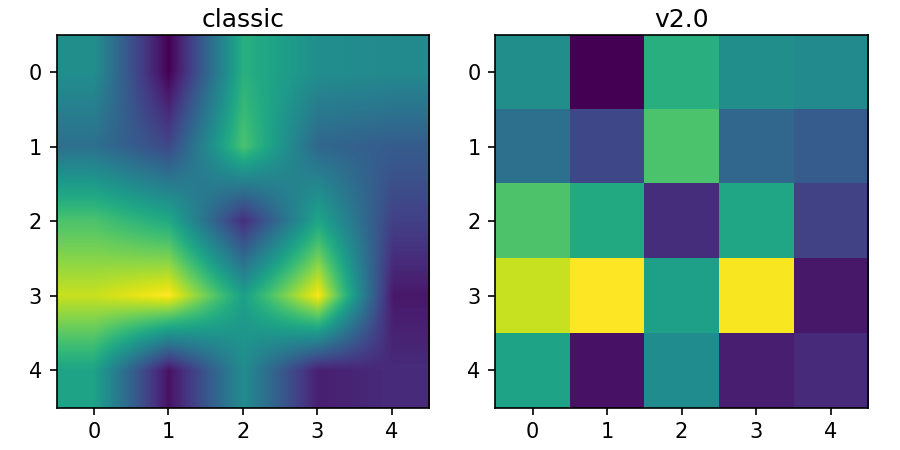

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), tight_layout=True)
imshow_demo(ax1, ax2)

### The imshow dragon

![interpolation issues](imshow_issue.png "Style changes")

### The `imshow` dragon

 - The old processing pipeline was input -> normed data -> map to RGB -> resample to screen
 - This interpolates in RGB space but color maps are not linear

**completely rewrote image display code**

 - new pipeline is input -> normalize -> resample to screen -> map to RGB


### Extended default font

<IPython.core.display.Javascript object>


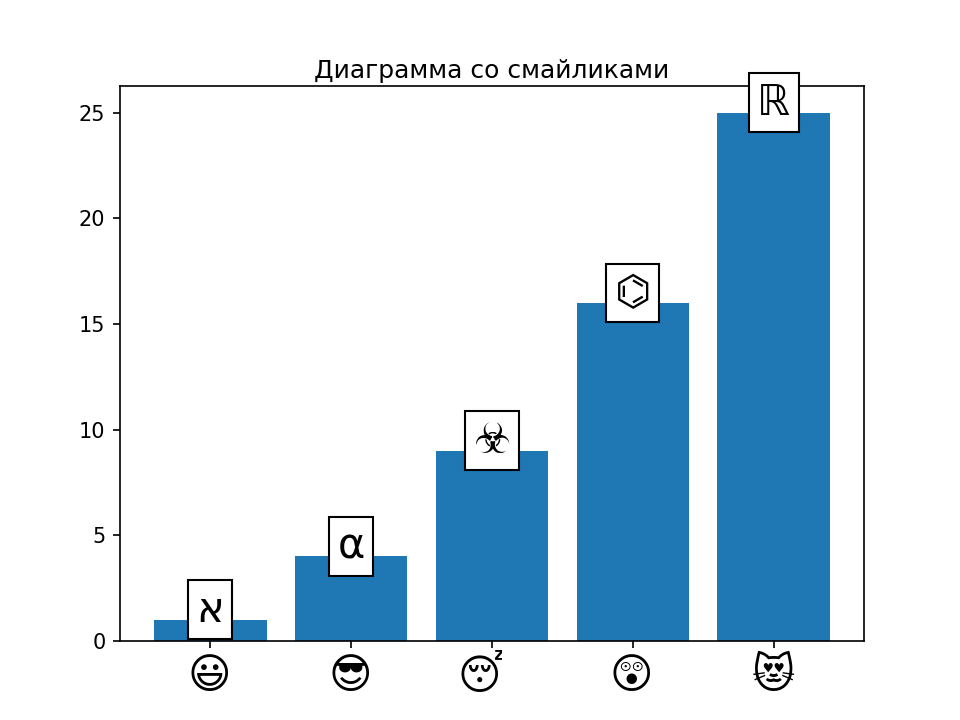

In [30]:
fig, ax = plt.subplots()
tick_labels = ['😃', '😎', '😴', '😲', '😻']
bar_labels = ['א', 'α', '☣', '⌬', 'ℝ']
x, y = range(5), [1, 4, 9, 16, 25]
ax.bar(x, y, tick_label=tick_labels, align='center')
ax.xaxis.set_tick_params(labelsize=20)
for _x, _y, t in zip(x, y, bar_labels):
    ax.annotate(t, (_x, _y), fontsize=20, ha='center',xytext=(0, -2),
                textcoords='offset pixels', bbox={'facecolor': 'w'})
ax.set_title('Диаграмма со смайликами')

### xkcd colors
 - xkcd ran a color survey -> 954 cround-sourced names

<IPython.core.display.Javascript object>


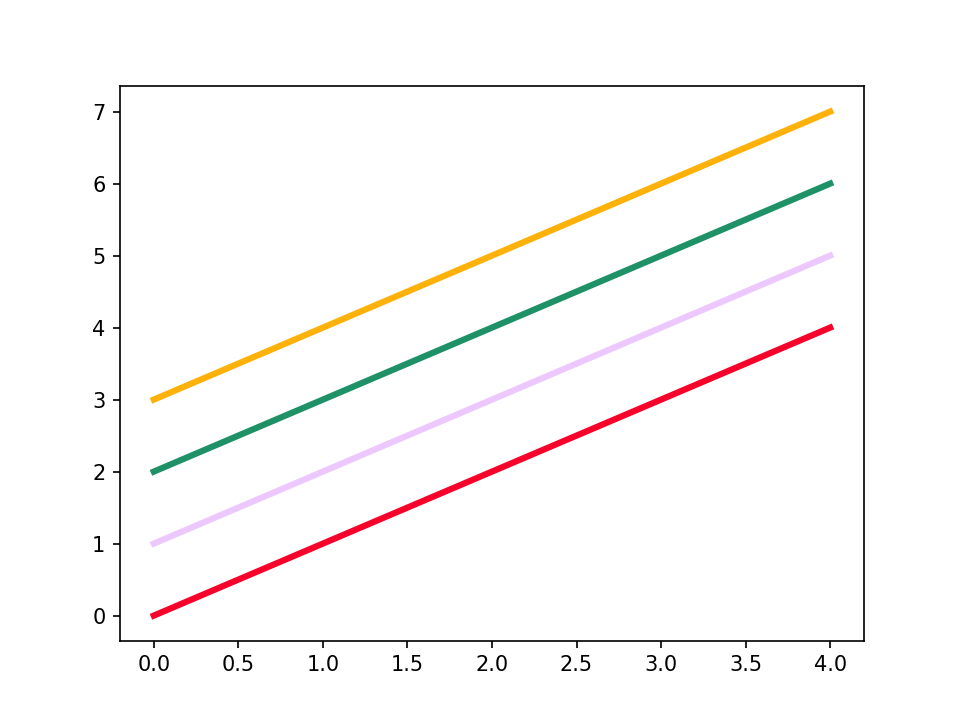

In [31]:
fig, ax = plt.subplots()
ax.plot(np.arange(5), color='xkcd:cherry red', lw=3)
ax.plot(np.arange(5) + 1, color='xkcd:light lilac', lw=3)
ax.plot(np.arange(5) + 2, color='xkcd:viridian', lw=3)
ax.plot(np.arange(5) + 3, color='xkcd:saffron', lw=3)

## Other goodies

 - automatic IPython event loop integration
 - `ipympl`: native ipwidget integration of nbAgg
 - `bins='auto'` passes throuh `hist` with numpy 1.11+
 - lots of documenation updates
 - qt `figureoptions` improvements
 - web/nb Agg HiDPI support
 - OSX backend is now Agg based
 - improved Qt5 support
 - boxplot defaults improved
 - 1yr of bug fixes

## automatic re-draw (new 1.5)


LIVE TERMINAL DEMO

## matplotlib is alive and well

 - Signed FSA with NumFocus
 - Currently formalizing our goverance

### Have a very broad contributor base

Extract author + commit date from git from 2015-01-01 till last monday

    echo 'time&name' > commits_time_author.csv; 
    git log --no-merges --since=2015-01-01 --pretty=format:'%at&%aN <%aE>' >> commits_time_author.csv

In [32]:
def plot_cummlative_commits(commits, *, ax):
    cum_commits = np.r_[[0], np.cumsum(sorted(commits.groupby('name').size(), reverse=True))]
   
    ln, = ax.step(range(len(cum_commits)), cum_commits, where='post')
    ax.set_ylabel('cumulative commits')
    ax.set_xlabel('commiter #')
    ax.set_title("{} unique contributors from 2015-01-01 ".format(len(cum_commits)-1))
    return ln

<IPython.core.display.Javascript object>


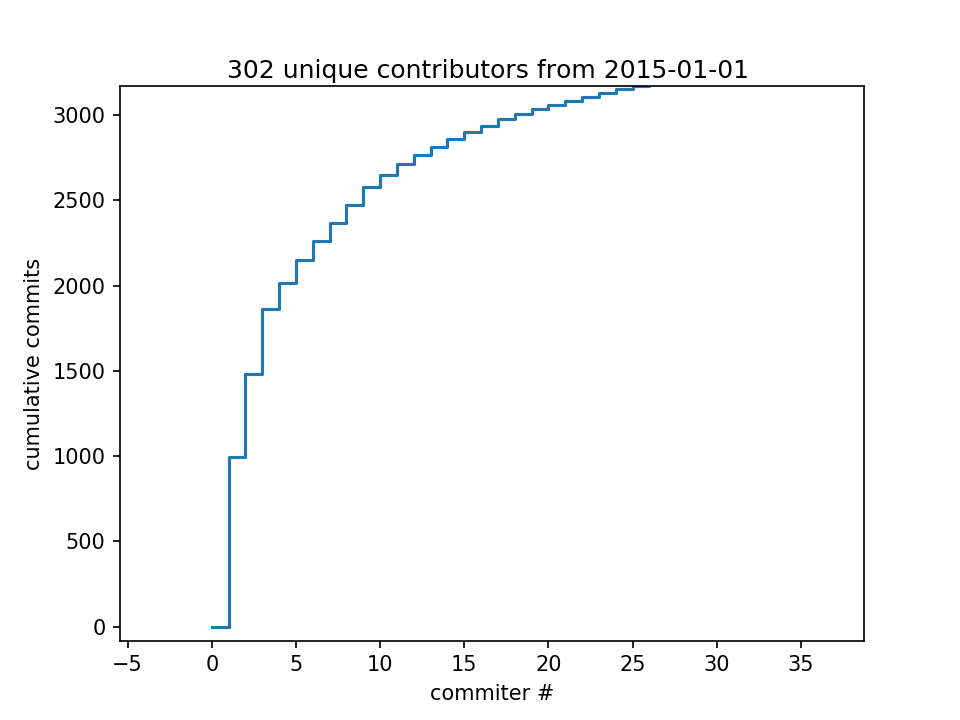

In [33]:
commits = pd.read_csv('commits_time_author.csv', sep='&')
fig, ax = plt.subplots()
ln = plot_cummlative_commits(commits, ax=ax)

In [34]:
def stats_plotter(ax, left_edges, unq_by_week, col, ylabel):
    ln, = ax.step(left_edges,
                  unq_by_week[col], color='k', where='post', lw=2)

    hln = ax.axhline(unq_by_week[col].mean(), color='forestgreen', zorder=0, lw=2)
    ax.set_ylabel(ylabel)
    return ln, hln


def by_window_binner(ax1, ax2, commits, start, stop, step, window_name):
    edges = np.arange(start.timestamp(), stop.timestamp() + step, step)
    left_edges = [dt.datetime.fromtimestamp(t) for t in edges[:-1]]

    gb = commits.groupby(pd.cut(commits['time'], edges))
    unq_by_bin = gb.agg(lambda x: len(set(x)))
    
    stats_plotter(ax1, left_edges, unq_by_bin, 'time', 'commits per {}'.format(window_name))
    stats_plotter(ax2, left_edges, unq_by_bin, 'name', 'committers per {}'.format(window_name))

    ax1.set_xlim((start, stop))

    fig.autofmt_xdate()

<IPython.core.display.Javascript object>


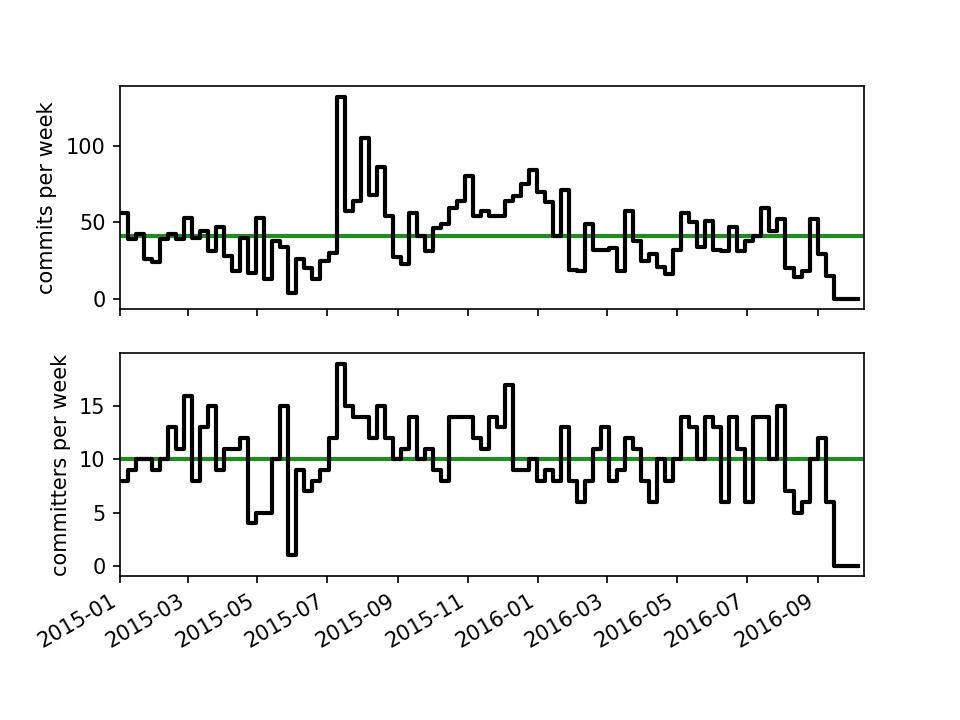

In [35]:
start, stop = dt.datetime(2015, 1, 1), dt.datetime.now()

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
by_window_binner(ax1, ax2, commits, start, stop, 7*24*60*60, 'week')

### Place in community

 - we really are friendly, just slow!
 - always looking for new contributors 
 - usage now well outside domain knowledge of core-devs
  - need domain experts to develop specialized plotting tools
  - scikits model of cooperative independent libraries
  - happy to host projects under matplotlib.org organization
 - we want to be a substrate for domain-specific plotting

## Thank you

  - John Hunter

In [36]:
import textwrap
print('\n'.join(textwrap.wrap(', '.join(sorted([n.split('<')[0].rstrip() for n in commits.name.unique()])), width=70)))

4over7, AbdealiJK, Acanthostega, Adrien Chardon, Adrien F. Vincent,
Adrien VINCENT, Alan Du, Alberto, Alex Rothberg, Alexander Taylor, Ali
Mehdi, Ali Uneri, Alistair Muldal, Allan Haldane, AmyTeegarden,
Andreas Hilboll, Andreas Mayer, Andy Zhu, Anton Akhmerov, Antony Lee,
BHT, Ben Congdon, Ben Root, Benjamin Congdon, Benjamin Reedlunn, Brett
Cannon, Brian McLaughlin, Bruno Beltran, CJ Carey, Cameron Davidson-
Pilon, Casey Webster, Casper van der Wel, Chen Karako, Chris Holdgraf,
Christian Stade-Schuldt, Christoph Gohlke, Cimarron Mittelsteadt,
DaCoEx, DanHickstein, Danhickstein, David Kua, David Stansby,
Devashish Deshpande, Diego Mora Cespedes, Dora Fraeman, Duncan
Macleod, Dylan Evans, E. G. Patrick Bos, Elena Glassman, Elliott Sales
de Andrade, Elvis Stansvik, Eric Dill, Eric Firing, Eric Ma, Eric O.
LEBIGOT (EOL), Erik Bray, Eugen Beck, Eugen Beck, Eugene Yurtsev,
Fabien Maussion, Fabio Zanini, Federico Ariza, Federico Ariza, Florian
LB, Francesco Montesano, Francoise Provencher, F

In [25]:
plt.close('all')

## on master teaser
 - categorical